In [58]:
# first import libaray to use 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
# reading data 
df = pd.read_csv('dateset/sales data-set.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [60]:
# looking a shape of date
df.shape

(421570, 5)

In [61]:
# create Devriod Columns
df.insert(loc=2,column='Return_Rate',value=np.random.rand(df.shape[0],1))
df['Weekly_Returns'] = df['Weekly_Sales'] * df['Return_Rate']
df.head()

,Store,Dept,Return_Rate,Date,Weekly_Sales,IsHoliday,Weekly_Returns
0,1,1,0.674568,05/02/2010,24924.50,False,16813.263927
1,1,1,0.285949,12/02/2010,46039.49,True,13164.943274
2,1,1,0.893164,19/02/2010,41595.55,False,37151.647691
3,1,1,0.346076,26/02/2010,19403.54,False,6715.101573
4,1,1,0.979604,05/03/2010,21827.90,False,21382.691134


In [62]:
df_subset = df[df['Return_Rate'] <= .25]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105428 entries, 9 to 421568
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           105428 non-null  int64  
 1   Dept            105428 non-null  int64  
 2   Return_Rate     105428 non-null  float64
 3   Date            105428 non-null  object 
 4   Weekly_Sales    105428 non-null  float64
 5   IsHoliday       105428 non-null  bool   
 6   Weekly_Returns  105428 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 5.7+ MB


In [63]:
df_subset['Store']=df_subset['Store'].astype(str)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105428 entries, 9 to 421568
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           105428 non-null  object 
 1   Dept            105428 non-null  int64  
 2   Return_Rate     105428 non-null  float64
 3   Date            105428 non-null  object 
 4   Weekly_Sales    105428 non-null  float64
 5   IsHoliday       105428 non-null  bool   
 6   Weekly_Returns  105428 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 5.7+ MB


<ipython-input-63-4a323242d26b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Store']=df_subset['Store'].astype(str)


In [64]:
type(df_subset['Store'].iloc[0])

str

In [65]:
df_subset['Store'].head()

9     1
11    1
12    1
16    1
17    1
Name: Store, dtype: object

In [66]:
df_subset.sort_values(by=['Store'] + ['Dept'] + ['Date'], ascending=True).head()

,Store,Dept,Return_Rate,Date,Weekly_Sales,IsHoliday,Weekly_Returns
82,1,1,0.237111,02/09/2011,15277.27,False,3622.407248
56,1,1,0.177200,04/03/2011,20327.61,False,3602.058287
17,1,1,0.043893,04/06/2010,17558.09,False,770.668679
100,1,1,0.150212,06/01/2012,16567.69,False,2488.663915
26,1,1,0.237170,06/08/2010,17508.41,False,4152.470561


In [67]:
df_subset['Weekly_Returns'] = round(df_subset['Weekly_Returns'],2)
df_subset.head()

<ipython-input-67-4a298a5d4fc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Weekly_Returns'] = round(df_subset['Weekly_Returns'],2)


,Store,Dept,Return_Rate,Date,Weekly_Sales,IsHoliday,Weekly_Returns
9,1,1,0.215624,09/04/2010,42960.91,False,9263.41
11,1,1,0.244365,23/04/2010,16145.35,False,3945.36
12,1,1,0.107610,30/04/2010,16555.11,False,1781.50
16,1,1,0.240903,28/05/2010,15580.43,False,3753.38
17,1,1,0.043893,04/06/2010,17558.09,False,770.67


In [68]:
df_sliced = df_subset.filter(items=['Weekly_Sales','Weekly_Returns'])
df_sliced.head()

,Weekly_Sales,Weekly_Returns
9,42960.91,9263.41
11,16145.35,3945.36
12,16555.11,1781.50
16,15580.43,3753.38
17,17558.09,770.67


In [69]:
df_dropped = df.drop(columns=['IsHoliday','Dept'])
df_dropped.head()

,Store,Return_Rate,Date,Weekly_Sales,Weekly_Returns
0,1,0.674568,05/02/2010,24924.50,16813.263927
1,1,0.285949,12/02/2010,46039.49,13164.943274
2,1,0.893164,19/02/2010,41595.55,37151.647691
3,1,0.346076,26/02/2010,19403.54,6715.101573
4,1,0.979604,05/03/2010,21827.90,21382.691134


In [70]:
df_req = pd.DataFrame(df.groupby(['Store','Dept']).agg(Nums_Weeks = ('Date','count')).reset_index())
df_req.sort_values(by='Nums_Weeks',ascending=True).head(10)

,Store,Dept,Nums_Weeks
3170,43,55,1
1295,17,99,1
1332,18,39,1
1340,18,48,1
2464,33,27,1
2842,38,99,1
264,4,39,1
1576,21,50,1
3224,44,34,1
1604,21,96,1


In [71]:
df_req['Nums_Weeks'].unique()

array([143, 113,  71,  22, 125,  33, 133,   3,   4, 122,  37,  66, 139,
        12, 136, 111,   2,  10,  42, 115,   8,  54,  61, 123,   1,  21,
       140,  36, 124,  49,  13, 141,  23,   7, 100,  57,  69,  11,  56,
         5,  98, 119, 103,  74, 127,  67,  18,  91,   9,  40,  95,  52,
        85,  16,  83,  76,  39, 117, 135, 116,  14,   6, 131,  35, 110,
       142,  17, 101,  15, 105,  79, 126,  82,  25,  30,  84,  48, 114,
       137,  43,  24,  96,  28,  99, 129,  97,  60,  78, 121, 108, 130,
        77,  92,  81,  88,  41, 132, 107,  27,  44, 104,  19, 138, 102,
       120,  38,  29, 118,  51, 128,  90,  64,  20, 112,  87,  86,  32,
        46,  93,  53,  59,  26,  62,  50,  68, 106, 134,  89,  75,  31,
        45,  65, 109,  34,  58,  70], dtype=int64)

In [72]:
#univariate
def univariate(pct_desc, pct, field):
    print(pct_desc+": "+field.quantile(pct).astype(str)) 

univariate('Max', 1, df_subset['Weekly_Sales'])
univariate('99th Percentile', .99, df_subset['Weekly_Sales'])
univariate('95th Percentile', .95, df_subset['Weekly_Sales'])
univariate('90th Percentile', .90, df_subset['Weekly_Sales'])
univariate('75th Percentile', .75, df_subset['Weekly_Sales'])
univariate('50th Percentile', .50, df_subset['Weekly_Sales'])
univariate('25th Percentile', .25, df_subset['Weekly_Sales'])
univariate('10th Percentile', .10, df_subset['Weekly_Sales'])
univariate('5th Percentile', .05, df_subset['Weekly_Sales'])
univariate('Min', .00, df_subset['Weekly_Sales'])

Max: 420586.57
99th Percentile: 105643.0092999995
95th Percentile: 61073.64849999998
90th Percentile: 42822.75100000001
75th Percentile: 20258.505
50th Percentile: 7540.89
25th Percentile: 2050.5600000000004
10th Percentile: 280.1680000000002
5th Percentile: 57.400000000000006
Min: -705.0


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

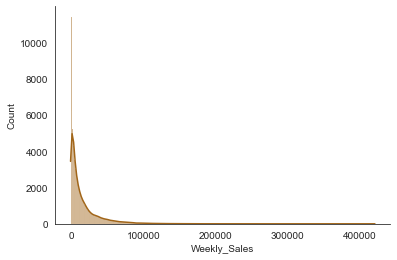

In [73]:
fig, ax = plt.subplots()
# Weekly_Sales
sns.set_style('white')
sns.despine()
sns.histplot(df_subset['Weekly_Sales'],kde=True,ax=ax)

<AxesSubplot:ylabel='Weekly_Sales'>

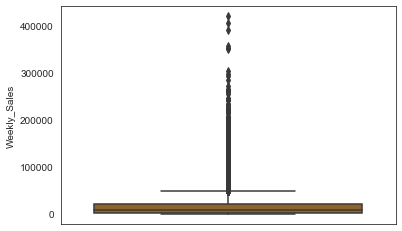

In [76]:
sns.boxplot(y='Weekly_Sales',data=df_subset)

In [78]:
df_no_outliers = df_subset[df_subset['Weekly_Sales'] <= df_subset['Weekly_Sales'].quantile(0.9)]
df_no_outliers.head()

,Store,Dept,Return_Rate,Date,Weekly_Sales,IsHoliday,Weekly_Returns
11,1,1,0.244365,23/04/2010,16145.35,False,3945.36
12,1,1,0.107610,30/04/2010,16555.11,False,1781.50
16,1,1,0.240903,28/05/2010,15580.43,False,3753.38
17,1,1,0.043893,04/06/2010,17558.09,False,770.67
19,1,1,0.217037,18/06/2010,16216.27,False,3519.54


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Weekly_Returns'>

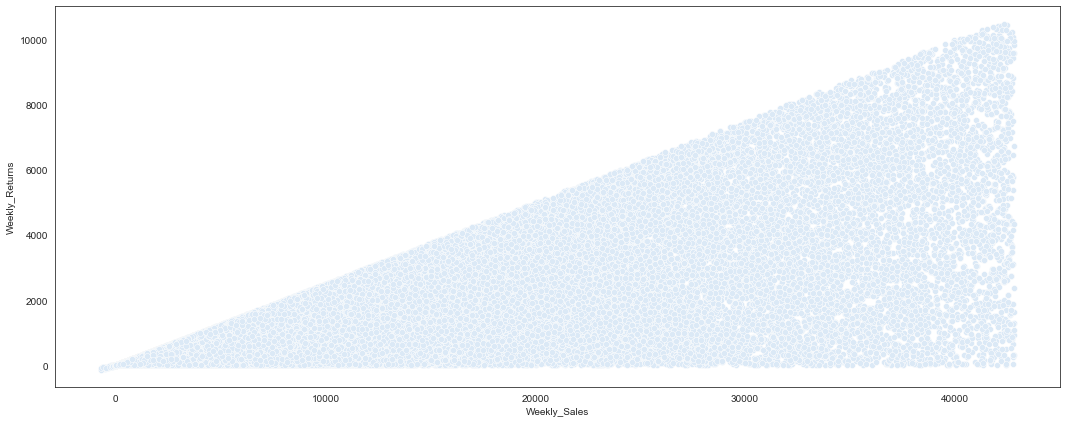

In [84]:
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.set_palette('Blues')
sns.scatterplot(data=df_no_outliers,x='Weekly_Sales',y='Weekly_Returns',ax=ax)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


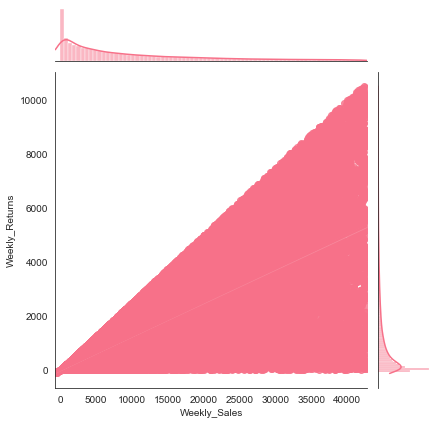

In [86]:
sns.set_palette('husl')
sns.jointplot('Weekly_Sales','Weekly_Returns',data=df_no_outliers,kind='reg',ax=ax)

In [87]:
df_no_outliers['year'] = pd.DatetimeIndex(df_no_outliers['Date']).year.astype(str)
df_no_outliers.head()

<ipython-input-87-fc9899f17828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['year'] = pd.DatetimeIndex(df_no_outliers['Date']).year.astype(str)


,Store,Dept,Return_Rate,Date,Weekly_Sales,IsHoliday,Weekly_Returns,year
11,1,1,0.244365,23/04/2010,16145.35,False,3945.36,2010
12,1,1,0.107610,30/04/2010,16555.11,False,1781.50,2010
16,1,1,0.240903,28/05/2010,15580.43,False,3753.38,2010
17,1,1,0.043893,04/06/2010,17558.09,False,770.67,2010
19,1,1,0.217037,18/06/2010,16216.27,False,3519.54,2010


In [88]:
print(df_no_outliers['year'].max())
print(min(df_no_outliers['year']))

2012
2010


In [90]:
#Sum the Sales and Returns for each year

pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

#groupby year and summarize sales and returns
df_agg = pd.DataFrame(df_no_outliers.groupby(
     ['year']
 ).agg(
     Total_Sales = ('Weekly_Sales','sum'),
    Total_Returns = ('Weekly_Returns', 'sum')
).reset_index()
                      )
#create a LOG value
df_agg['LOG Returns']=np.log2(df_agg['Total_Returns']).astype(int) 
df_agg['LOG Sales']=np.log2(df_agg['Total_Sales']).astype(int)

df_agg['Returns in M$']=(df_agg['Total_Returns']/1000000).astype(int)
df_agg['Sales in M$']=(df_agg['Total_Sales']/1000000).astype(int)

#show the min/max for the xlim on charting
print(max(df_agg['Total_Returns']))
print(max(df_agg['Total_Sales']))

df_agg

42498373.20999977
339415533.7500019


,year,Total_Sales,Total_Returns,LOG Returns,LOG Sales,Returns in M$,Sales in M$
0,2010,"322,183,718.03","40,332,321.97",25,28,40,322
1,2011,"339,415,533.75","42,498,373.21",25,28,42,339
2,2012,"279,532,989.86","34,573,792.61",25,28,34,279


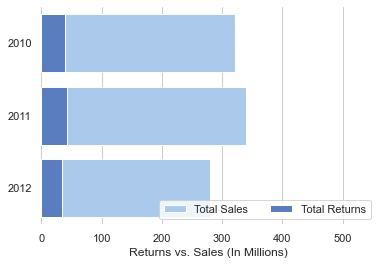

In [92]:
#Plot the sales & returns on a bar

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))


# Plot the total sales
sns.set_color_codes("pastel")
sns.barplot(x="Sales in M$", y="year", data=df_agg,
            label="Total Sales", color="b")

# Plot the total returns
sns.set_color_codes("muted")
sns.barplot(x="Returns in M$", y="year", data=df_agg,
            label="Total Returns", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 555), ylabel="",
       xlabel="Returns vs. Sales (In Millions)")
sns.despine(left=True, bottom=True)